# **If you like it, move it up. :)**

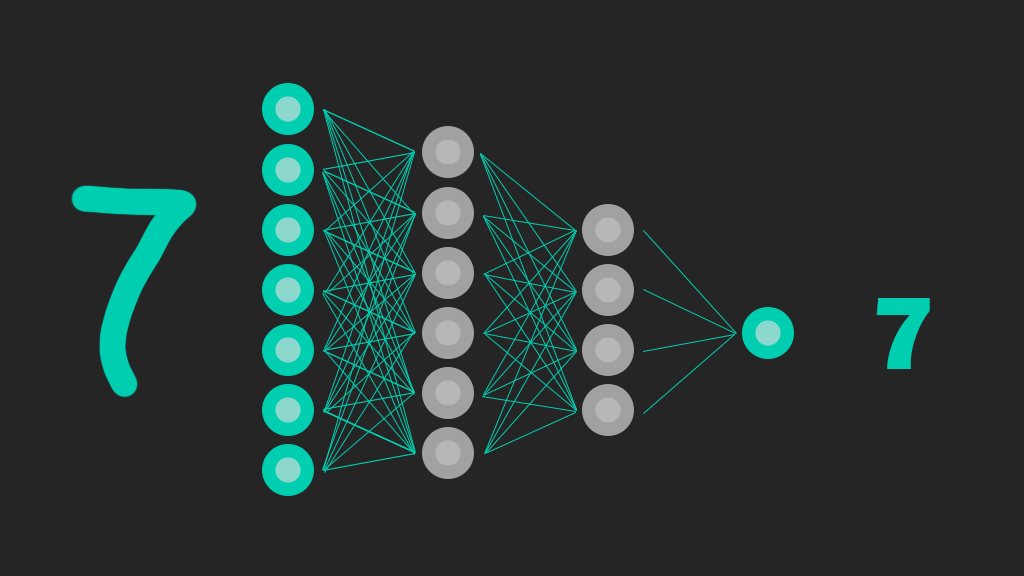

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# #Datamızı okutuyoruz - Reading data 

In [ ]:
warnings.filterwarnings("ignore")
train1=pd.read_csv("../input/digit-recognizer/train.csv")
train=pd.read_csv("../input/new-digit-dataset/Digit_Train_Final.csv")
test=pd.read_csv("../input/digit-recognizer/test.csv")
train.head()

# Bağımsız değişkenler ve Hedef değerimizi seçiyoruz. - Independent Variable and target value

In [ ]:
x=train.drop(labels=["label"],axis=1)
y=train["label"]

# Veri setinden örnek bir görselleştirme - Vizualization in dataset digit image

In [ ]:
train.head()

In [ ]:
del train['Unnamed: 0']

In [ ]:
x=train.drop(['label'],axis=1)
y=train['label']

# Veri setinden görselleştirmeler - Vizualizations in dataset

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x.iloc[3].as_matrix().reshape(28,28), ax)
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='copper')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x.iloc[9].as_matrix().reshape(28,28), ax)
plt.title(train.iloc[9,0])
plt.axis("off")
plt.show()

# Normalization - Normalize etme

In [ ]:
#x=x/255.0
#test=test/255.0
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x=norm.fit_transform(x)
test=norm.fit_transform(test)


# İşlenecek görsellerin biçimini ayarlama - Setting the shape of images

In [ ]:
x=x.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)
print("x shape:",x.shape)
print("test shape:",test.shape)

# Etiket kodlaması ve veri setimizin train-test olarak ayrılması - Label Encoding and Separation of our data set as train-test

In [ ]:
from keras.utils.np_utils import to_categorical
y=to_categorical(y,num_classes=10)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.009,random_state=33)

In [ ]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape),
print("test shape:",test.shape)

# Python Keras Kütüphanesiyle Nöral Ağı oluşturma - Create Neural Network with Keras in Python

In [ ]:
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,LeakyReLU,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = 3,padding = 'Same',input_shape = (28,28,1)))
model.add(Conv2D(filters = 128, kernel_size = 3,padding = 'Same',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same'))
model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'Same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))

# Tam bağlantı - Fully connected

In [ ]:
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))
model.summary()

# Optimizasyon fonksiyonlarını tanımlamak - Define the optimizer

In [ ]:
from keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam
#optimizer=Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
optimizer=Adamax(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=0.1, decay=0.1)
#optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0)

# Modeli derlemek -  Compile the model

In [ ]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

# Öğrenme oranı optimizasyonu - Optimum Learning Rate

In [ ]:
from keras.callbacks import ReduceLROnPlateau,BaseLogger,EarlyStopping
lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.1, min_lr=0.00001)
b_l=BaseLogger(stateful_metrics=None)
e_stop = EarlyStopping(monitor='val_acc', patience=4, verbose=1)

In [ ]:
callbacks=[lr_reduction,b_l,e_stop]
batch_size=89
epochs=20

# Elimizdeki verilerin farklı rotasyonlarını alarak verilerimizi çoğaltır. - Data Augmentation

In [ ]:
datagen = ImageDataGenerator()
datagen.get_random_transform(img_shape=(28,28,1),seed=3)
datagen.flow(x=x, y=y, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

datagen.fit(x_train)

# Modelin uygunlugu - Fit the model

In [ ]:
information = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),epochs=epochs,validation_data = (x_test, y_test), steps_per_epoch=x_train.shape[0] // batch_size,callbacks=callbacks) 

# Periyotlardaki doğrulama kayıpları - Validation loss in epochs

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
plt.plot(information.history["val_loss"],color="silver",linewidth=4,label="Validation Loss")
plt.plot(information.history["loss"],color="yellowgreen",linewidth=4,label="Train Loss")
plt.title("Train - Test Loss", fontsize=25, color='lime')
plt.xlabel("Number Of Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

# Confusion Matrix ile tahminlerin doğruluğu - Prediction verification with Confusion Matrix

In [ ]:
plt.style.use('seaborn-white')
Y_head=model.predict(x_test)
Y_head_class=np.argmax(Y_head,axis=1)
Y_true=np.argmax(y_test,axis=1)
conf_mtrx=confusion_matrix(Y_true,Y_head_class)
plt.subplots(figsize=(20,15))
sb.heatmap(conf_mtrx,annot=True, annot_kws={"size": 16}, linewidths=0.8,cmap="viridis",fmt='d', linecolor="purple")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", fontsize=25, color='indigo')
plt.show()

In [ ]:
karsilastirma=pd.DataFrame()
karsilastirma["prediction"]=Y_head_class
karsilastirma["true"]=Y_true

In [ ]:
karsilastirma['correct'] = karsilastirma.prediction == karsilastirma.true 
karsilastirma["correct"].value_counts()

In [ ]:
karsilastirma[karsilastirma['correct']==False]

In [ ]:
predicted= model.predict(test)

In [ ]:
predicted = np.argmax(predicted,axis = 1)

predicted = pd.Series(predicted,name="Label")

In [ ]:
result = pd.concat([pd.Series(range(1,len(test)+1),name = "ImageId"),predicted],axis = 1)

result.to_csv("Digit_Recognizer_predicted.csv",index=False)

In [ ]:
result.head()